In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

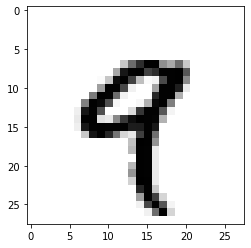

In [4]:
plt.imshow(x_train[4], cmap=plt.cm.binary)
plt.show()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#We need to scale down the values within a particular range

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
#Normalized dataset

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = tf.keras.Sequential() #feedforward model

model.add(tf.keras.layers.Flatten()) #converts 28x28 to 1x784
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #fully connected layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.softmax)) #softmax for multiple outputs 

In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3190 - acc: 0.9120
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1188 - acc: 0.9638
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0801 - acc: 0.9750
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0600 - acc: 0.9803
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0452 - acc: 0.9852
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0358 - acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0286 - acc: 0.9908
Epoch 8/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0228 - acc: 0.9929
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss:

In [11]:
validation_loss, validation_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0995 - acc: 0.9769


In [13]:
model.save("E:\Projects\Hand Written Digit Recognition\digit_recog.model")

In [ ]:
#Saved the model in a local folder and now will call it and test it.

In [16]:
new_model = tf.keras.models.load_model(r"E:\Projects\Hand Written Digit Recognition\digit_recog.model")

In [19]:
pred = new_model.predict(x_test)
pred[0]

array([1.06532303e-13, 1.78167203e-10, 1.98878292e-09, 1.17355478e-06,
       6.18959665e-17, 3.45558760e-12, 6.02622221e-19, 9.99998808e-01,
       1.35264248e-11, 8.34895542e-10, 2.67063491e-18, 5.18594226e-18,
       1.76709540e-18, 2.01439407e-18, 5.75950640e-18, 1.46423014e-18,
       2.67655165e-17, 1.24820148e-18, 1.56321502e-17, 2.06212466e-18,
       7.08379641e-19, 2.78611408e-18, 5.61615724e-19, 5.85011577e-18,
       8.93721813e-19, 1.96329209e-18, 3.99775025e-18, 1.64796236e-18,
       1.98339072e-18, 7.29863020e-19, 1.33030123e-18, 3.39683580e-18,
       3.37364310e-18, 6.60224918e-18, 1.53513919e-17, 2.65780906e-18,
       3.01028939e-19, 1.31476264e-18, 6.64903286e-18, 3.30464466e-18,
       5.06973455e-18, 3.40290544e-18, 2.83575960e-18, 3.60020642e-19,
       1.81999939e-18, 2.99702089e-19, 4.66605925e-18, 8.45965212e-19,
       1.06043862e-18, 4.48634485e-19, 2.52042677e-18, 5.03782513e-19,
       3.88739650e-18, 8.38351428e-19, 2.29552236e-18, 1.00191404e-18,
      

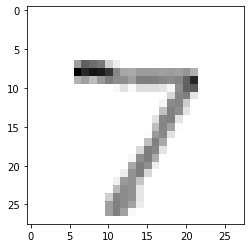

In [20]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [24]:
#Since our predictions are in an array format, we need to convert it into a numeric format, i.e, pred[0] gives an array output
#of the number 7 but we need to convert it.

In [25]:
import numpy as np

np.argmax(pred[0])

7